In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score 
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('HR_DS.csv')
data.set_index('EmployeeNumber', inplace=True)

In [3]:
# Convert 'Attrition' column to binary
data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})

In [4]:
# Label encode categorical columns
label_encoders = {}
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for col in categorical_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    label_encoders[col] = encoder

In [5]:
# Split data into features and target
features = data.drop(['Attrition', 'Over18', 'StandardHours'], axis=1)
target = data['Attrition'].values

In [6]:
# Display target distribution
print(Counter(target))

Counter({0: 1233, 1: 237})


In [7]:
# Handle class imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=99)
features_over, target_over = oversampler.fit_resample(features, target)
print(Counter(target_over))

Counter({1: 1233, 0: 1233})


In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_over, target_over, 
                                                    test_size=0.2, random_state=99)


<h1> LogisticRegression

In [9]:
# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Make predictions
predictions = logistic_model.predict(X_test)

In [11]:
# Display accuracy and confusion matrix
print('Accuracy Score -', accuracy_score(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)

Accuracy Score - 0.6497975708502024


In [12]:
# Performance Evaluation Metrics 
print("The accuracy is {:.2f}".format(accuracy_score(y_test, predictions)))
print("The balanced accuracy is {:.2f}".format(balanced_accuracy_score(y_test, predictions)))
print("The recall is {:.2f}".format(recall_score(y_test, predictions)))
print("The precision is {:.2f}".format(precision_score(y_test, predictions)))
print("The F1 Score is {:.2f}".format(f1_score(y_test, predictions)))
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, predictions)))

The accuracy is 0.65
The balanced accuracy is 0.65
The recall is 0.67
The precision is 0.63
The F1 Score is 0.65
The AUC ROC Score is 0.65


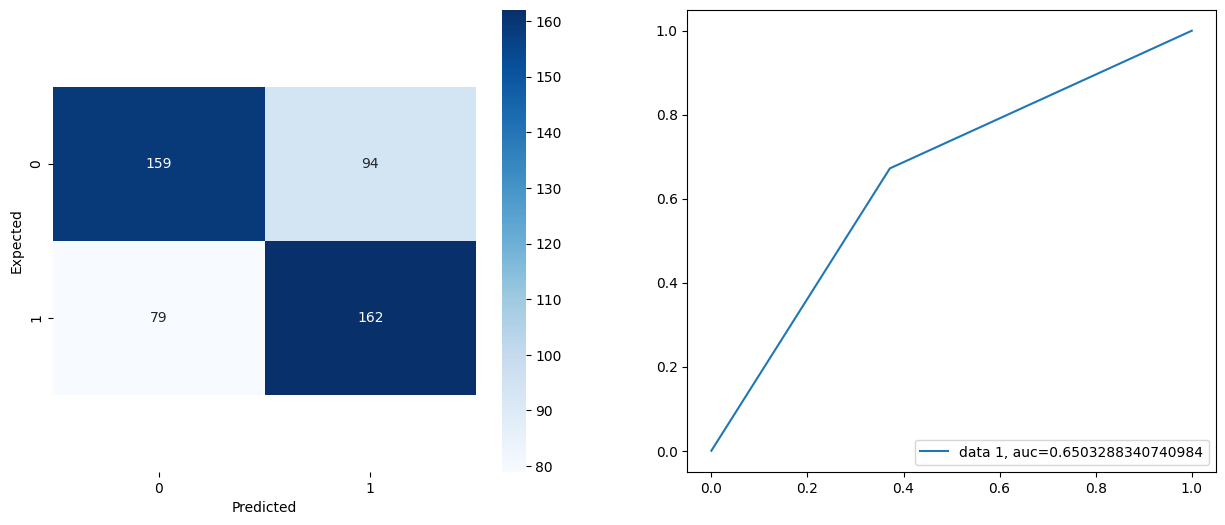

In [13]:
# Plot confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion matrix
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap='Blues', fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Expected')
ax1.set_ylim(len(confusion)+0.5, -0.5)

# ROC curve
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, predictions)
auc_value = roc_auc_score(y_test, predictions)
ax2.plot(fpr, tpr, label=f'data 1, auc={auc_value}')
ax2.legend(loc=4)

plt.show()

<h1> RandomForestClassifier

In [14]:
# Train a RandomForest model
rf_model = RandomForestClassifier(random_state=99)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=99)

In [15]:
# Make predictions
predictions = rf_model.predict(X_test)

In [16]:
# Display accuracy and confusion matrix
print('Accuracy Score -', accuracy_score(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)

Accuracy Score - 0.9696356275303644


In [17]:
# Performance Evaluation Metrics 
print("The accuracy is {:.2f}".format(accuracy_score(y_test, predictions)))
print("The balanced accuracy is {:.2f}".format(balanced_accuracy_score(y_test, predictions)))
print("The recall is {:.2f}".format(recall_score(y_test, predictions)))
print("The precision is {:.2f}".format(precision_score(y_test, predictions)))
print("The F1 Score is {:.2f}".format(f1_score(y_test, predictions)))
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, predictions)))

The accuracy is 0.97
The balanced accuracy is 0.97
The recall is 0.99
The precision is 0.95
The F1 Score is 0.97
The AUC ROC Score is 0.97


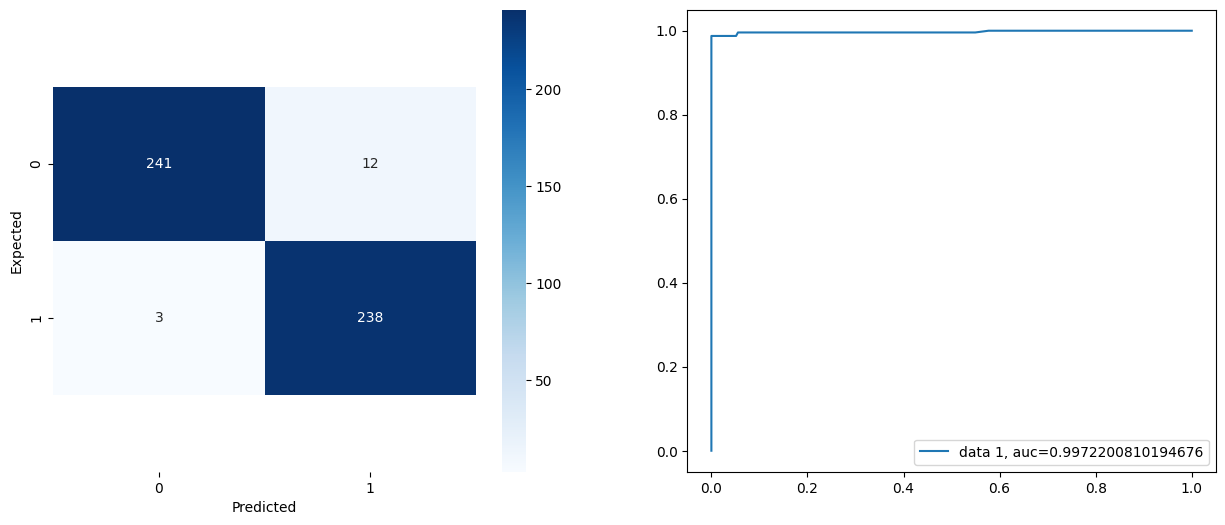

In [18]:
# Plot confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion matrix
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap='Blues', fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Expected')
ax1.set_ylim(len(confusion)+0.5, -0.5)

# ROC curve
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_value = roc_auc_score(y_test, y_pred_proba)
ax2.plot(fpr, tpr, label=f'data 1, auc={auc_value}')
ax2.legend(loc=4)

plt.show()

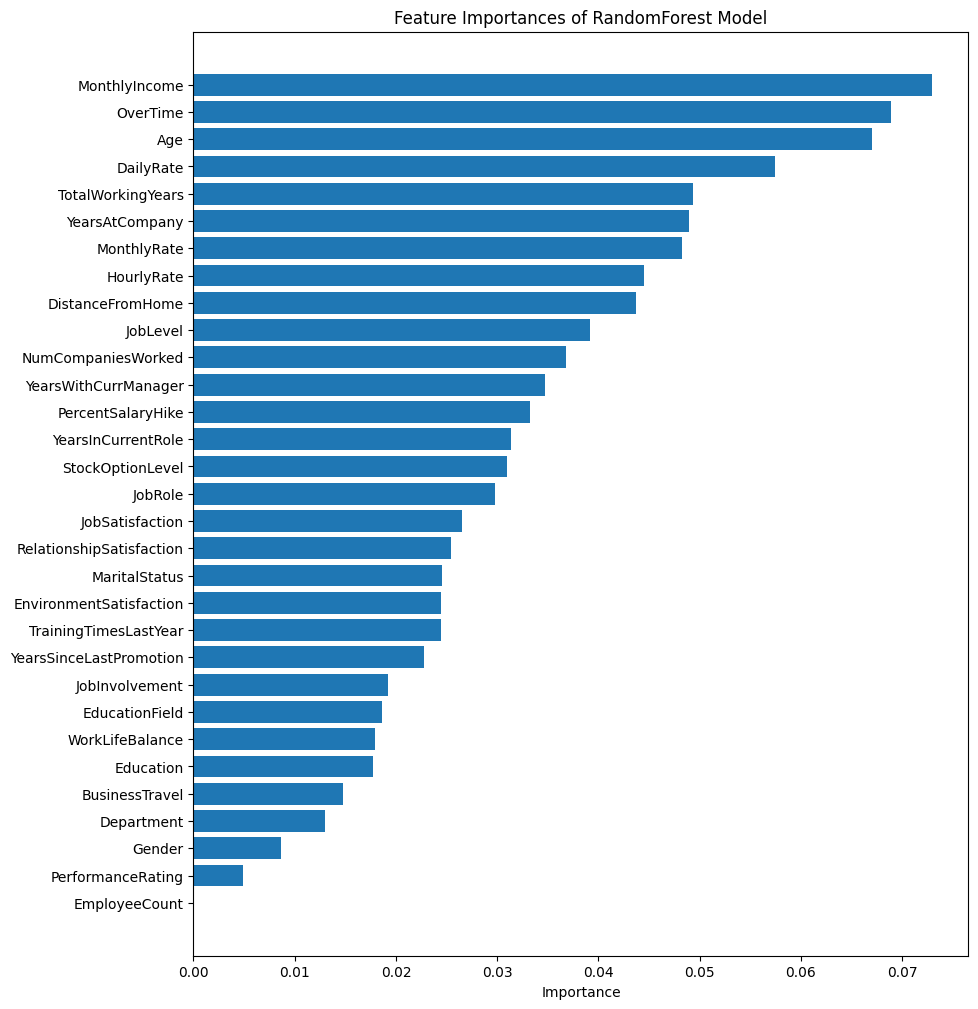

In [19]:
# Extract feature importances from the trained model
importances = rf_model.feature_importances_

# Get the feature names
feature_names = features_over.columns

# Sort the features by importance
sorted_idx = importances.argsort()

# Plot
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances of RandomForest Model')
plt.show()

<h1> DecisionTree

In [20]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=99)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=99)

In [21]:
# Make predictions
predictions_dt = dt_model.predict(X_test)

In [22]:
# Display accuracy and confusion matrix
print('Accuracy Score -', accuracy_score(y_test, predictions_dt))
confusion = confusion_matrix(y_test, predictions_dt)

Accuracy Score - 0.9129554655870445


In [23]:
# Performance Evaluation Metrics 
print("The accuracy is {:.2f}".format(accuracy_score(y_test, predictions_dt)))
print("The balanced accuracy is {:.2f}".format(balanced_accuracy_score(y_test, predictions_dt)))
print("The recall is {:.2f}".format(recall_score(y_test, predictions_dt)))
print("The precision is {:.2f}".format(precision_score(y_test, predictions_dt)))
print("The F1 Score is {:.2f}".format(f1_score(y_test, predictions_dt)))
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, predictions_dt)))

The accuracy is 0.91
The balanced accuracy is 0.91
The recall is 0.99
The precision is 0.85
The F1 Score is 0.92
The AUC ROC Score is 0.91


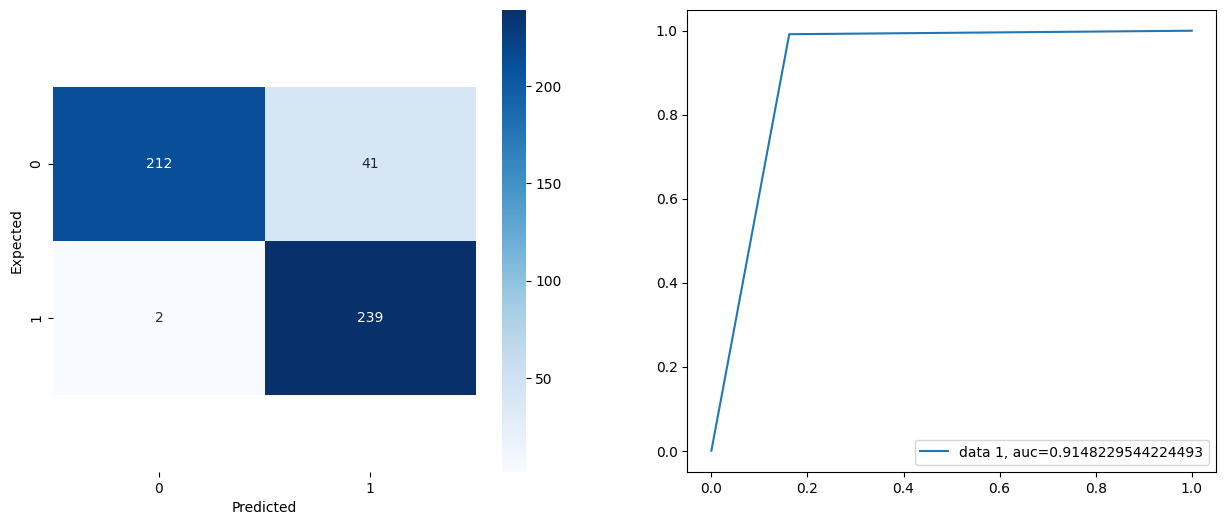

In [24]:
# Plot confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion matrix
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap='Blues', fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Expected')
ax1.set_ylim(len(confusion)+0.5, -0.5)

# ROC curve
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_value = roc_auc_score(y_test, y_pred_proba)
ax2.plot(fpr, tpr, label=f'data 1, auc={auc_value}')
ax2.legend(loc=4)

plt.show()

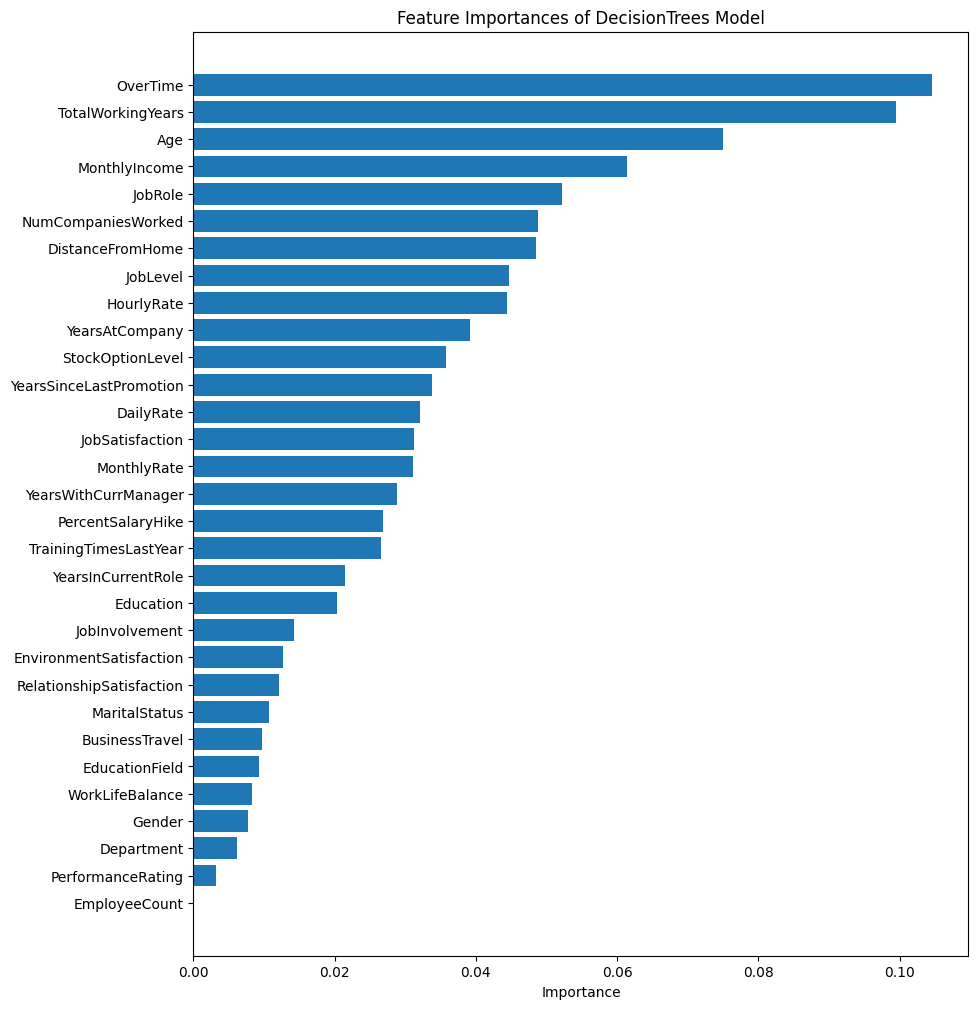

In [25]:
# Extract feature importances from the trained model
importances = dt_model.feature_importances_

# Get the feature names
feature_names = features_over.columns

# Sort the features by importance
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances of DecisionTrees Model')
plt.show()

<h1> Hyperparameter Tuning for RandomForest

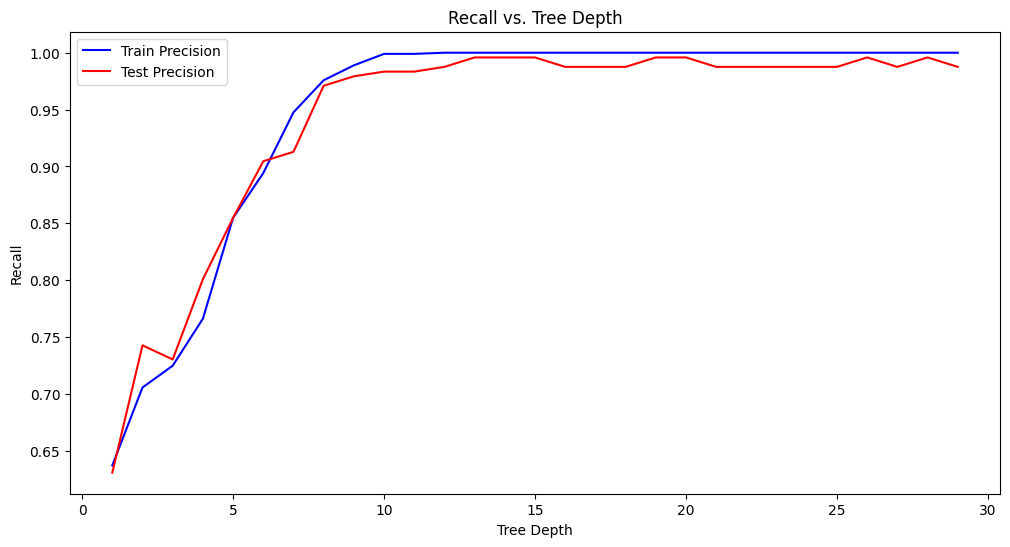

In [26]:
train_results = []
test_results = []

max_depths = list(range(1, 30))

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    train_precision = recall_score(y_train, train_pred)
    train_results.append(train_precision)
    
    test_pred = rf.predict(X_test)
    test_precision = recall_score(y_test, test_pred)
    test_results.append(test_precision)

plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_results, 'b', label='Train Precision')
plt.plot(max_depths, test_results, 'r', label='Test Precision')
plt.xlabel('Tree Depth')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall vs. Tree Depth')
plt.show()

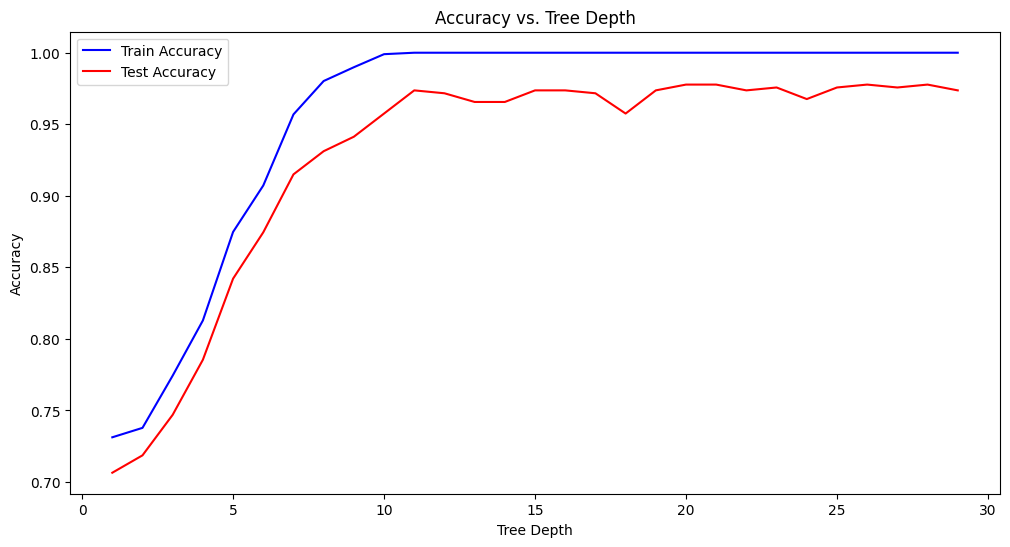

In [27]:
train_results = []
test_results = []

# Max depth values
max_depths = list(range(1, 30))

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    
    test_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_results.append(test_accuracy)

plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Tree Depth')
plt.show()

In [28]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time

In [29]:
# Predict using the best model
best_predictions = best_rf.predict(X_test)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("The accuracy is {:.2f}".format(accuracy_score(y_test, best_predictions)))
print("The balanced accuracy is {:.2f}".format(balanced_accuracy_score(y_test, best_predictions)))
print("The recall is {:.2f}".format(recall_score(y_test, best_predictions)))
print("The precision is {:.2f}".format(precision_score(y_test, best_predictions)))
print("The F1 Score is {:.2f}".format(f1_score(y_test, best_predictions)))
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, best_predictions)))

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
The accuracy is 0.99
The balanced accuracy is 0.99
The recall is 0.99
The precision is 0.99
The F1 Score is 0.99
The AUC ROC Score is 0.99


In [30]:
train_accuracy = best_rf.score(X_train, y_train)
test_accuracy = best_rf.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.99


In [31]:
scores = cross_val_score(best_rf, X_train, y_train, cv=10)
print(f"Cross-Validation Mean Score: {np.mean(scores):.2f}")
print(f"Standard Deviation: {np.std(scores):.2f}")

Cross-Validation Mean Score: 0.98
Standard Deviation: 0.01


In [32]:
best_rf = grid_search.best_estimator_
best_predictions = best_rf.predict(X_test)
# Display accuracy and confusion matrix
print('Accuracy Score -', accuracy_score(y_test, best_predictions))
confusion = confusion_matrix(y_test, best_predictions)

Accuracy Score - 0.9878542510121457


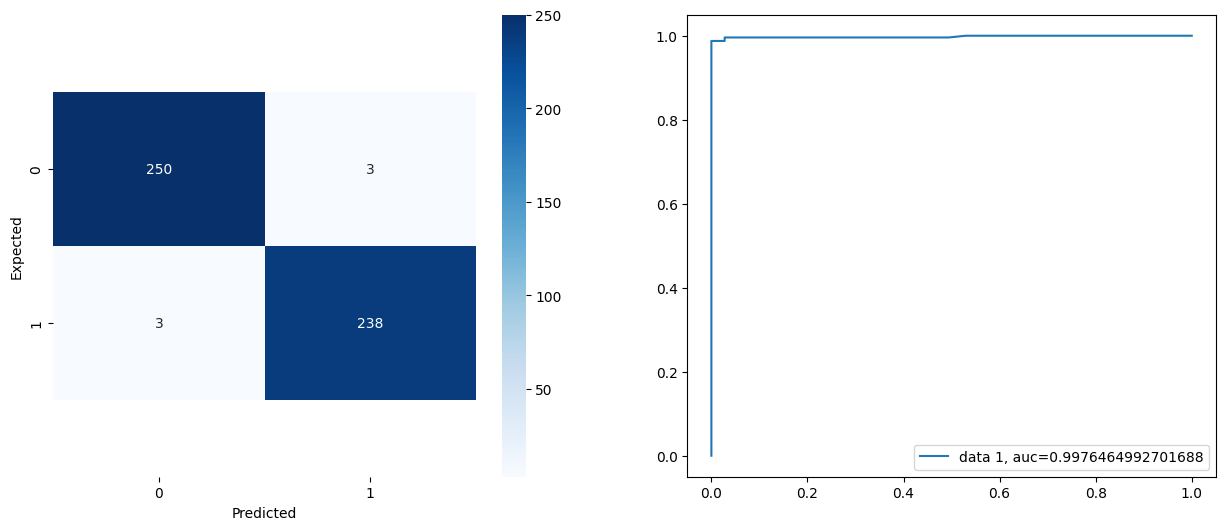

In [33]:
best_confusion = confusion_matrix(y_test, best_predictions)
# Plot confusion matrix and ROC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion matrix
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap='Blues', fmt='d', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Expected')
ax1.set_ylim(len(confusion)+0.5, -0.5)

# ROC curve
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_value = roc_auc_score(y_test, y_pred_proba)
ax2.plot(fpr, tpr, label=f'data 1, auc={auc_value}')
ax2.legend(loc=4)

plt.show()

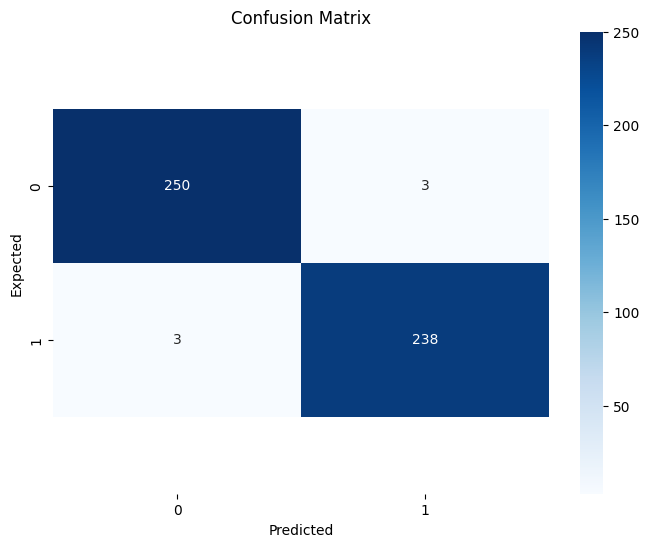

In [35]:
best_confusion = confusion_matrix(y_test, best_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(best_confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.ylim(len(best_confusion)+0.5, -0.5)
plt.title('Confusion Matrix')
plt.show()

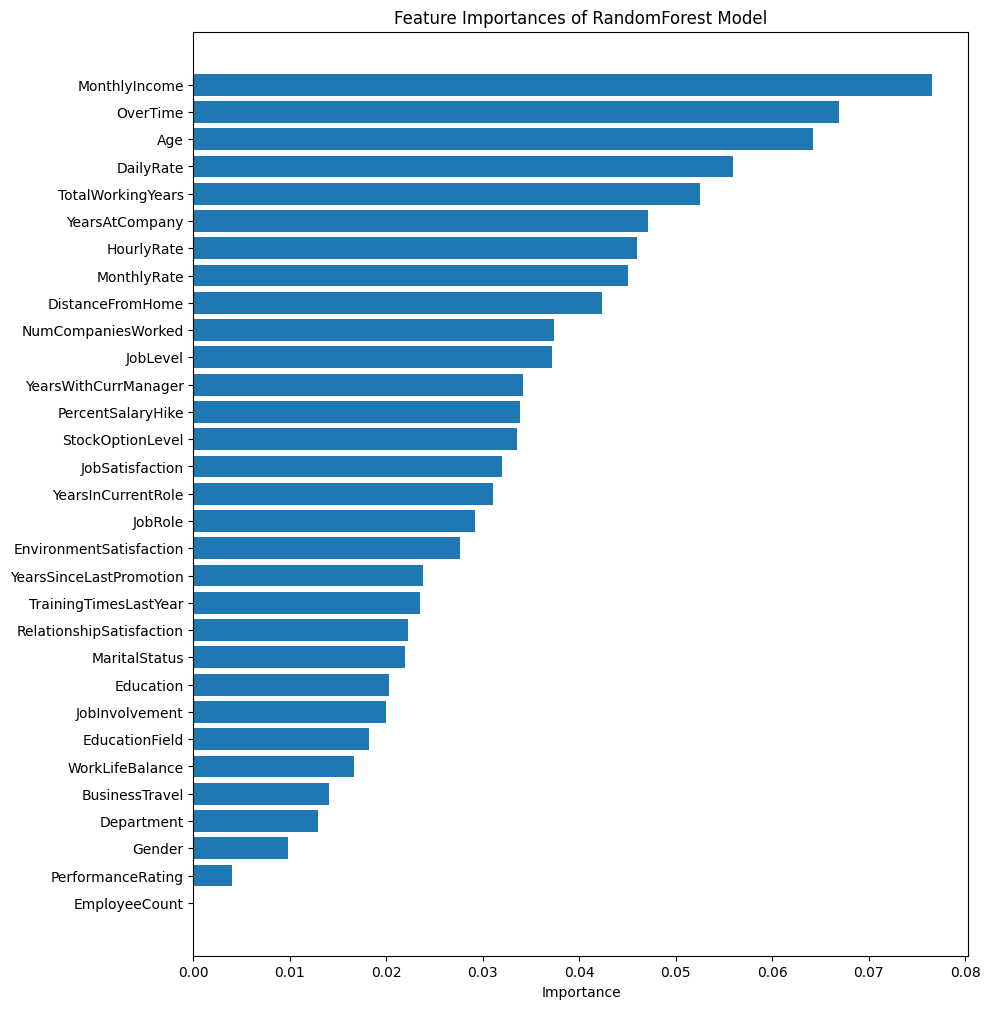

In [36]:
# Extract feature importances from the trained model
importances = best_rf.feature_importances_

# Get the feature names
feature_names = features_over.columns

# Sort the features by importance
sorted_idx = importances.argsort()

# Plot
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances of RandomForest Model')
plt.show()

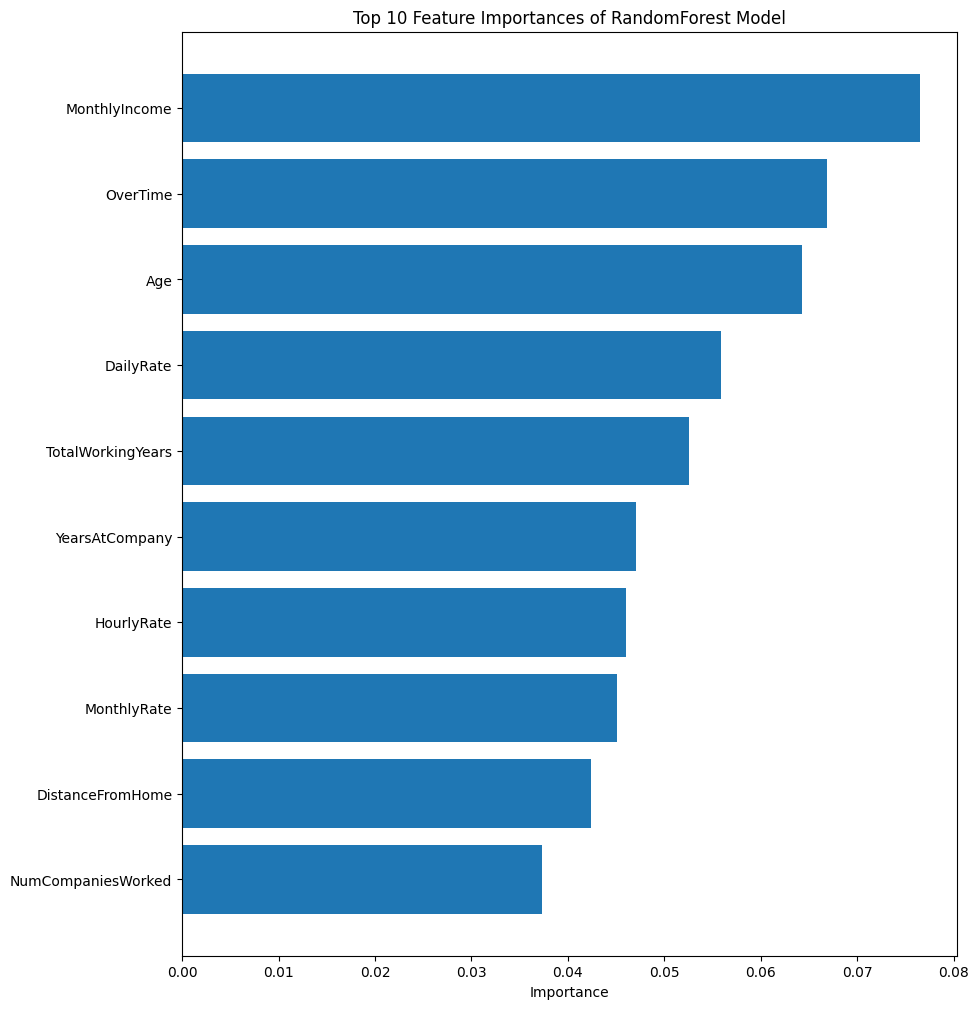

In [37]:
# Extract feature importances from the trained model
importances = best_rf.feature_importances_

# Get the feature names
feature_names = features_over.columns

# Sort the features by importance and select the top 10
sorted_idx = importances.argsort()[-10:]

# Plot
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances of RandomForest Model')
plt.show()

In [32]:
for index in sorted_idx:
    print(f"Feature: {feature_names[index]}, Importance: {importances[index]:.4f}")

Feature: EmployeeCount, Importance: 0.0000
Feature: PerformanceRating, Importance: 0.0040
Feature: Gender, Importance: 0.0098
Feature: Department, Importance: 0.0129
Feature: BusinessTravel, Importance: 0.0141
Feature: WorkLifeBalance, Importance: 0.0167
Feature: EducationField, Importance: 0.0182
Feature: JobInvolvement, Importance: 0.0200
Feature: Education, Importance: 0.0203
Feature: MaritalStatus, Importance: 0.0219
Feature: RelationshipSatisfaction, Importance: 0.0223
Feature: TrainingTimesLastYear, Importance: 0.0235
Feature: YearsSinceLastPromotion, Importance: 0.0238
Feature: EnvironmentSatisfaction, Importance: 0.0276
Feature: JobRole, Importance: 0.0292
Feature: YearsInCurrentRole, Importance: 0.0311
Feature: JobSatisfaction, Importance: 0.0320
Feature: StockOptionLevel, Importance: 0.0336
Feature: PercentSalaryHike, Importance: 0.0338
Feature: YearsWithCurrManager, Importance: 0.0341
Feature: JobLevel, Importance: 0.0372
Feature: NumCompaniesWorked, Importance: 0.0373
Featu

In [ ]:
# Save the best model to a file
joblib.dump(best_rf, 'app_model/RF_model.pk1')

['RF_model.pkl']

In [ ]:
for col, encoder in label_encoders.items():
    joblib.dump(encoder, f"{col}_encoder.pk1")